# Titanic Survival Predictor

Author: Varun Poojari

This project is a machine learning model that predicts whether a passenger on the Titanic
would survive or not based on the data provided. The model is built using Python, specifically using
the Scikit-Learn library, and is trained on a dataset of Titanic passengers. 



In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
t=pd.read_csv('titanic.csv')

In [3]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: >

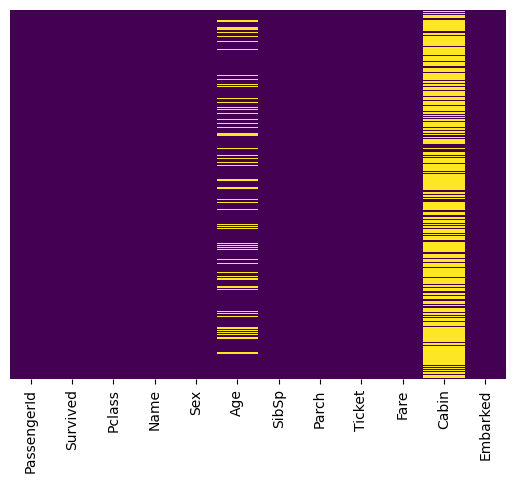

In [16]:
sns.heatmap(t.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

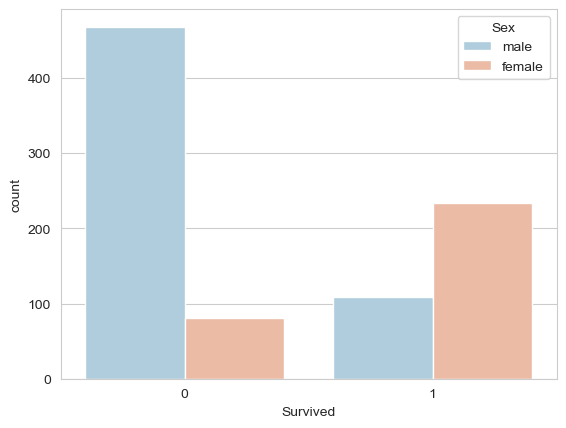

In [21]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue='Sex', data=t, palette='RdBu_r')

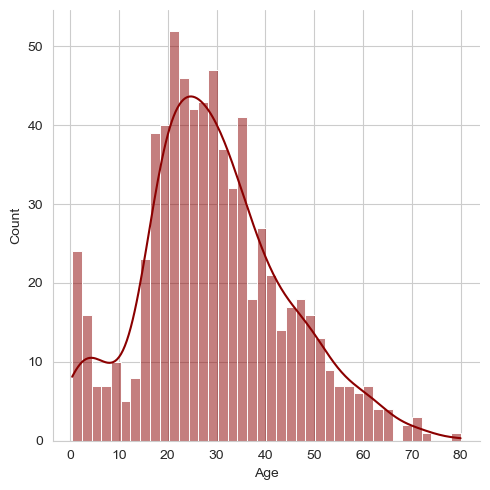

In [31]:
sns.displot(t['Age'].dropna(),kde=True,color= 'darkred', bins=40)

<Axes: >

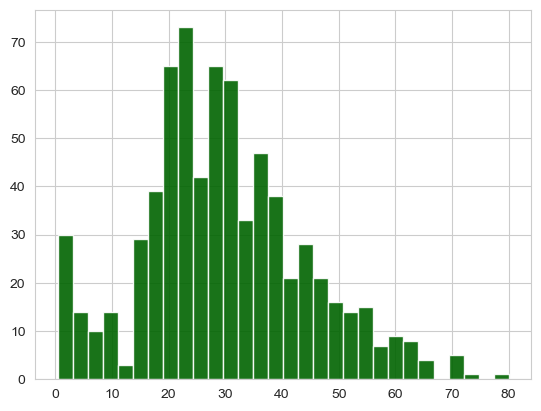

In [36]:
t['Age'].hist(bins=30, color='darkgreen',alpha=0.9)

<Axes: xlabel='SibSp', ylabel='count'>

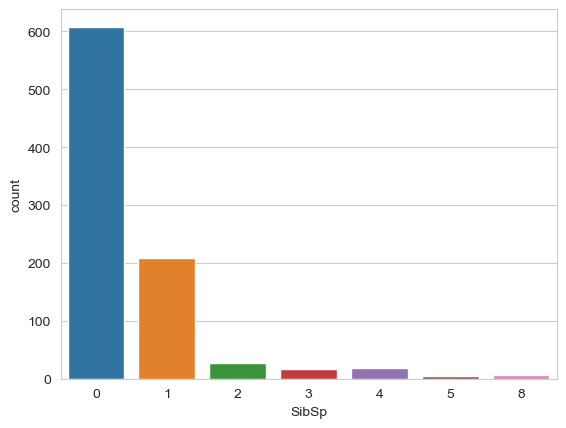

In [39]:
sns.countplot(x='SibSp',data=t)

<Axes: xlabel='Survived', ylabel='count'>

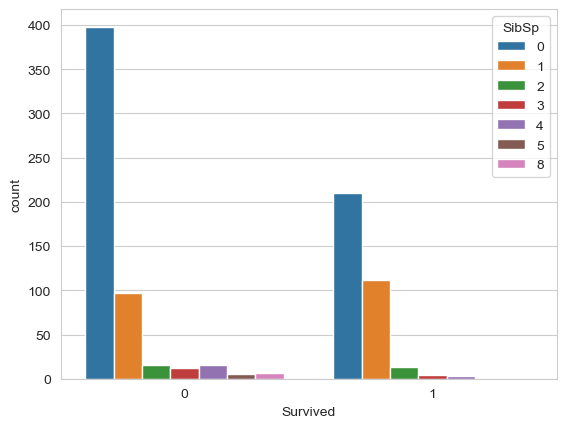

In [41]:
sns.countplot(x='Survived',hue='SibSp',data=t)

<Axes: xlabel='Pclass', ylabel='Age'>

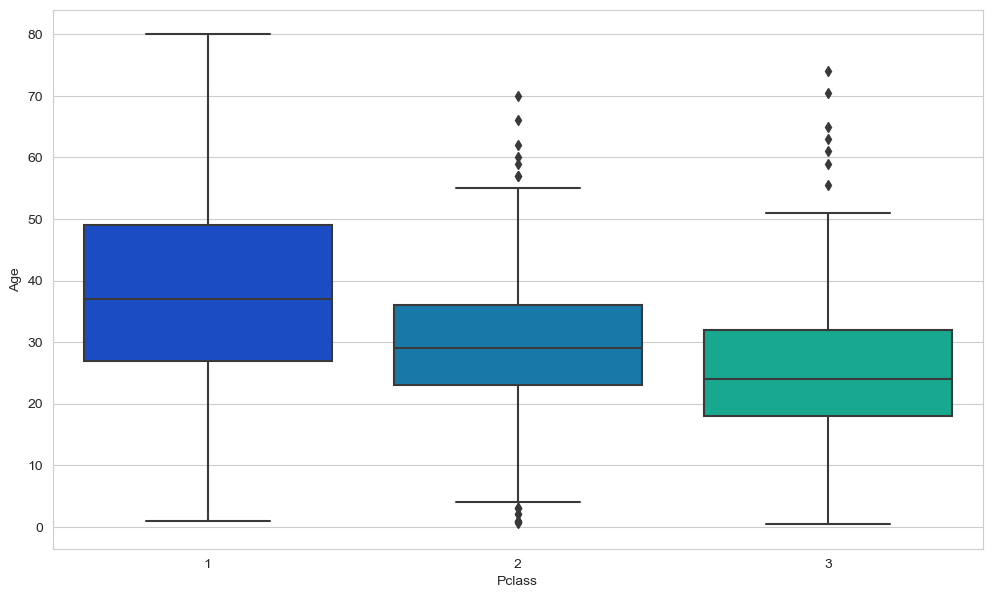

In [42]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=t,palette='winter')

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37 
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
        else:
            return Age  

In [50]:
t['Age']= t[['Age','pclass']].apply(filldis,axis=1)

KeyError: "['pclass'] not in index"

In [52]:
pd.get_dummies(t['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [53]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
sex1=pd.get_dummies(t['Embarked'])
Emabarked1=pd.get_dummies(t['Sex'])

In [57]:
t.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
t.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [64]:
t=pd.concat([t,sex1],axis=1)

In [65]:
t.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,C,Q,S,C,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,0,0,1,0,0,1


In [66]:
t.isnull()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,C,Q,S,C,Q,S
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False
